In [ ]:
#0501
import numpy as np

def MSE(y, t):
    return np.sum((y-t)**2)/t.size

t = np.array([1,    2, 3,   4])    
y1 = np.array([0.5, 1, 1.5, 2])

print("MSE(t, y1)=", MSE(t, y1))

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2))


MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


In [ ]:
#0502
import numpy as np
import tensorflow as tf

def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t))   # (y - t)**2

t = np.array([1,   2, 3,   4])    
y1 = np.array([0.5, 1, 1.5, 2])
#t = tf.convert_to_tensor(t, dtype=tf.float32)
#y1 = tf.convert_to_tensor(y1, dtype=tf.float32)

print("MSE(t, y1)=", MSE(t, y1).numpy())

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2).numpy())


MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


In [ ]:
#0503 - tf.keraqqs.losses.MeanSquaredError를 사용하여 MSE 계산
import numpy as np
import tensorflow as tf

t = np.array([1,   2, 3,   4])    
y1 = np.array([0.5, 1, 1.5, 2])
#t = tf.convert_to_tensor(t, dtype=tf.float32)
#y1 = tf.convert_to_tensor(y1, dtype=tf.float32)

MSE = tf.keras.losses.MeanSquaredError()

print("MSE(t, y1)=", MSE(t, y1).numpy())

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2).numpy())


MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


w=0.9853. b=0.0619, loss=0.0029


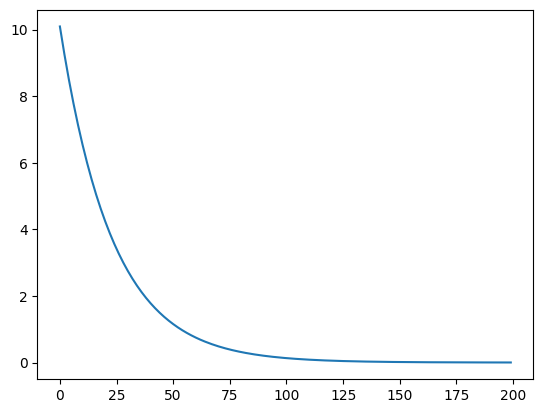

In [ ]:
#0601
import numpy as np
   
def MSE(y, t):
    return np.sum((y-t)**2)/t.size
    
x = np.arange(12) # [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]
t = np.arange(12)

w = 0.5     # 초기값
b = 0
lr = 0.001  # 0.01, learning rate

loss_list = [ ]
for epoch in range(200):
    y = w*x + b                      # calculate the output   
    dW = np.sum((y-t)*x)/(2*x.size)  # gradients
    dB = np.sum((y-t))/(2*x.size)
    
    w = w - lr*dW     # update parameters
    b = b - lr*dB

    y = w*x + b       # calculate the output
    loss = MSE(y, t)
    loss_list.append(loss)
##    if not epoch%10:
##        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={}".format(epoch, w, b, loss))

print("w={:>.4f}. b={:>.4f}, loss={:>.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show() 


epoch=0: w=  0.5353. b=  0.0046, loss=10.81862860060137
epoch=10: w=  0.7534. b=  0.0329, loss=2.0976293848446814
epoch=20: w=  0.8635. b=  0.0471, loss=0.19617798545036294
epoch=30: w=  0.9212. b=  0.0548, loss=0.17643021810984502
epoch=40: w=  0.9575. b=  0.0592, loss=0.05540704030477395
epoch=50: w=  0.9736. b=  0.0610, loss=0.015777226515139724
epoch=60: w=  0.9820. b=  0.0619, loss=0.003699273766967593
epoch=70: w=  0.9860. b=  0.0622, loss=0.0020650020102169373
epoch=80: w=  0.9884. b=  0.0622, loss=0.0017518694660110595
epoch=90: w=  0.9902. b=  0.0622, loss=0.0008299559413471209
w=  0.9911. b=  0.0621, loss=0.0012860317776235547


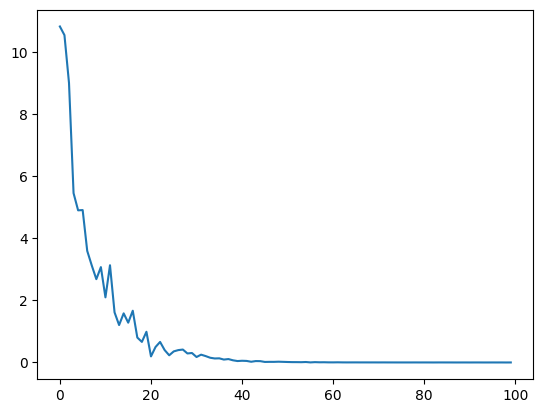

In [ ]:
#0602
import numpy as np
import matplotlib.pyplot as plt

def MSE(y, t):
    return np.sum((y-t)**2)/t.size

x = np.arange(12) # [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]
t = np.arange(12)

w = 0.5
b = 0
lr = 0.001  # 0.01, learning rate
loss_list = [ ]

train_size = t.size # 12
batch_size = 4
K = train_size// batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask]
        t_batch = t[mask]
        
        y = w*x_batch + b                               # calculate the output
        dW = np.sum((y-t_batch)*x_batch)/(2*batch_size) # gradients
        dB = np.sum((y-t_batch))/(2*batch_size)
        
        w = w - lr*dW   # update parameters
        b = b - lr*dB
        
        y = w*x_batch + b       # calculate the output
        loss += MSE(y, t_batch) # calculate MSE
    loss /= K  # average loss
    loss_list.append(loss)
    if not epoch%10:
        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={}".format(epoch, w, b, loss))

print("w={:>8.4f}. b={:>8.4f}, loss={}".format(w, b, loss))

plt.plot(loss_list)
plt.show() 


In [ ]:
#0701 - 자동 미분 계산
import tensorflow as tf

x = tf.Variable(2.0) # tf.Variable(2.0, trainable=True)
y = tf.Variable(3.0) # tf.Variable(3.0, trainable=True)
# 주어진 입력변수 x,y에 대한 그래디언트를 계산
with tf.GradientTape() as tape:
    z = x**2 + y**2
dx, dy = tape.gradient(z, [x, y])
# z' = 2x + 2y, 편미분 dx = 2x
print('dx=', dx.numpy())
print('dy=', dy.numpy())

dx= 4.0
dy= 6.0


In [3]:
#0702
import tensorflow as tf

x = tf.constant(2.0)
y = tf.constant(3.0)
# print(x)
# gradient tape는 "watched"로 설정된 변수만 추적할 수 있다
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    tape.watch(y)
    z = x**2 + y**2
dx = tape.gradient(z, x)
dy = tape.gradient(z, y)
#print(dx)
print('dx=', dx.numpy())
print('dy=', dy.numpy())

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)
dx= 4.0
dy= 6.0


In [5]:
#0703 - "watched" 사용
import tensorflow as tf

x = tf.Variable(2.0) # tf.Variable(2.0, trainable=True) - "watched"로 설정된 텐서이다 
y = tf.Variable(3.0) # tf.Variable(3.0, trainable=True)
# "watched"가 없으면 dx,dy는 none을 반환한다 
with tf.GradientTape(watch_accessed_variables=False) as tape:
    #tape.watch(x)
    #tape.watch(y)
    z = x**2 + y**2
dx, dy = tape.gradient(z, [x, y]) # 편미분

print('dx=', dx.numpy())
print('dy=', dy.numpy())

dx= 4.0
dy= 6.0


In [6]:
#0704 - 2차 미분
import tensorflow as tf

x = tf.Variable(3.0)

with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x**3
    dy = tape1.gradient(y, x) # dy = 3x**2
dy2 = tape2.gradient(dy, x) # dy2 = 6x
print('dy=', dy.numpy())
print('dy2=', dy2.numpy())


dy= 27.0
dy2= 18.0


[ 0  1  2  3  4  5  6  7  8  9 10 11]
w=0.9919. b=0.0610, loss=0.001054731197655201


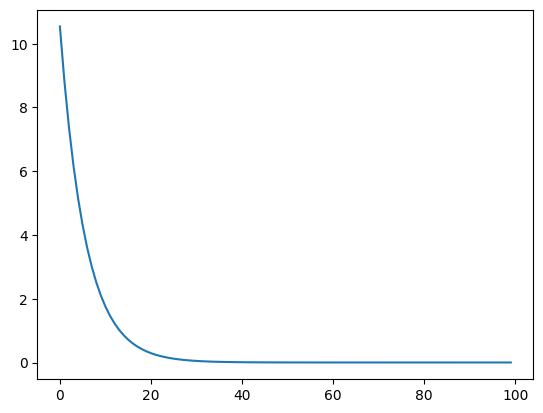

In [7]:
# step 08 - 텐서플로 단순 선형 회귀
#0801 - 자동 미분 계산 2 : y = xw + b의 가중치 w, b를 손실함수를 사용한 경사하강법으로 구현 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x = np.arange(12)
t = np.arange(12)
#print(x)
#x = tf.convert_to_tensor(x, dtype=tf.float32)
#t = tf.convert_to_tensor(t, dtype=tf.float32)

w = tf.Variable(0.5)
b = tf.Variable(0.0)
lr = 0.001   # learning rate

loss_list = [ ]  # for graph 
for epoch in range(100):   
    with tf.GradientTape() as tape:# y, loss를 tape에 기록 
        y = x*w + b # 단순 선형 회귀 모델 
        loss = tf.reduce_mean(tf.square(y - t))
    loss_list.append(loss.numpy())

    dW, dB = tape.gradient(loss, [w, b]) # 경사 계산
    w.assign_sub(lr * dW) # w = w + x * lr * error 갱신 - w를 갱신 -> 하강법
    b.assign_sub(lr * dB)
##    if not epoch%10:
##        print("epoch={}: w={:>.4f}. b={:>.4f}, loss={}".format(
##               epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>.4f}. b={:>.4f}, loss={}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()


w=0.9924. b=0.0559, batch_loss=0.0008884961328779658


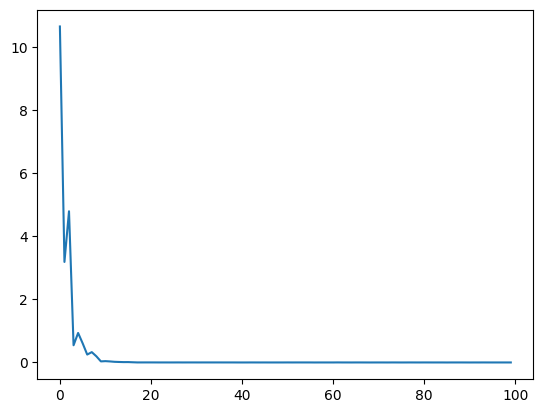

In [8]:
#0802 - 미니배치에 의한 확률적 경사하강법 
# 확률적 경사하강법, 미니배치 경사하강법 구글링으로 공부하기 
# 구글링: https://yhyun225.tistory.com/7
# 구글링: https://skyil.tistory.com/68
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x = np.arange(12)
t = np.arange(12)

w = tf.Variable(0.5)
b = tf.Variable(0.0)
lr= 0.001   # learning rate, 0.0001

train_size = x.size # 12
batch_size = 4 # mini-batch
K = train_size// batch_size

loss_list = [ ]
for epoch in range(100):
    batch_loss = 0.0
    for step in range(K): # 4번 돈다
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask] # stochastic
        t_batch = t[mask]
        
        with tf.GradientTape() as tape:
            y = w*x_batch + b
            loss = tf.reduce_mean(tf.square(y - t_batch))

        dW, dB = tape.gradient(loss, [w, b])
        w.assign_sub(lr * dW)
        b.assign_sub(lr * dB)

        batch_loss += loss.numpy() # pre-update loss
    batch_loss /= K #  average loss
    loss_list.append(batch_loss) 

##    if not epoch%10:
##        print("epoch={}: w={:>.4f}. b={:>.4f}, batch_loss={}".format(
##               epoch, w.numpy(), b.numpy(), batch_loss))

print("w={:>.4f}. b={:>.4f}, batch_loss={}".format(w.numpy(), b.numpy(), batch_loss))

plt.plot(loss_list)
plt.show()


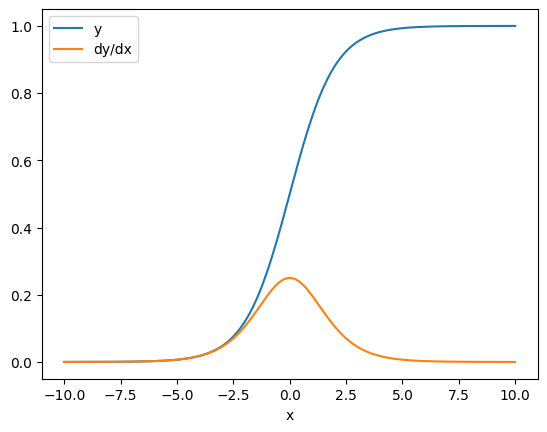

In [9]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [11]:
#0901 - step09 - 다변수 선형 회귀 > 2변수 선형 모델 MSE
import numpy as np
import tensorflow as tf

##def MSE(y, t):
##    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2
MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1] # 슬라이싱
t = train_data[:, -1:]  # 슬라이싱
#X = tf.convert_to_tensor(X, dtype=tf.float32)
#t = tf.convert_to_tensor(t, dtype=tf.float32)
print("X=", X)
print("t=", t)

tf.random.set_seed(1) # 난수열 초기화
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
##W = tf.Variable([[0.5],[0.5]], dtype=tf.float32)
##b = tf.Variable(0.0)
print("W=", W.numpy()) # w[0] = 1, w[2] = 2
print("b=", b.numpy()) # b = 3 << t = 1 * x1 + 2 * x2 + 3 이므로 

y = tf.matmul(X, W) + b #  y = x * w + b
print("y=", y.numpy())

loss = MSE(y, t)
print("MSE(y, t)=", loss.numpy())


X= [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t= [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]
W= [[-1.1012203]
 [ 1.5457517]]
b= [0.40308788]
y= [[-0.6981324 ]
 [-1.7993526 ]
 [-2.900573  ]
 [-4.001793  ]
 [ 0.8476193 ]
 [-0.25360093]
 [-1.3548213 ]
 [-2.4560416 ]]
MSE(y, t)= 70.80983


W=[[1.0032761]
 [2.005639 ]]. b=[2.9875078], loss=2.3675645934417844e-05


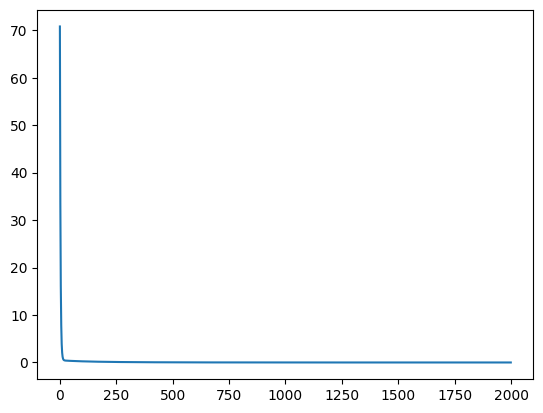

In [13]:
#0902 - 2변수 선형 회귀
# 목표값에 대하여 경사하강법으로 훈련 데이터 학습 목표 값과 비교 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1) # 난수열 초기화
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
lr = 0.01  # learning rate, 0.001

loss_list = [ ]
for epoch in range(2000):   
    with tf.GradientTape() as tape:
        y = tf.matmul(X, W) + b
        loss = MSE(y, t)
    loss_list.append(loss.numpy())

    dW, dB = tape.gradient(loss, [W, b])
    W.assign_sub(lr * dW)
    b.assign_sub(lr * dB)

##    if not epoch%100:
##        print("epoch={}: loss={}".format(epoch, loss.numpy()))

print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()


W=[[1.0030828]
 [2.0054665]]. b=[2.9877462], loss=2.7092167329101358e-05


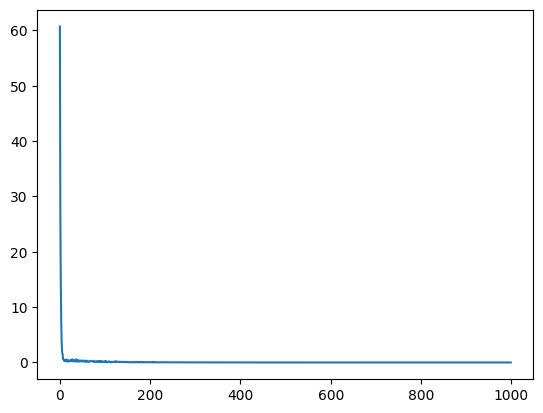

In [1]:
#0903 - 2변수 선형 회귀의 미니배치 학습
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
lr = 0.01   # learning rate, 0.001

train_size = X.shape[0]
batch_size = 4
K = train_size// batch_size

loss_list = [ ]
for epoch in range(1000):
    batch_loss = 0.0
    for step in range(K):
      # 미니배치로 확률적 경사 하강법 구현 - 랜덤 샘플링
        mask = np.random.choice(train_size, batch_size)
        x_batch = X[mask] # 미니 배치 데이터를 추출하여 계산 
        t_batch = t[mask]
        
        with tf.GradientTape() as tape:
            y = tf.matmul(x_batch, W) + b
            loss = MSE(y, t_batch)
            
        batch_loss += loss.numpy()
        
        dW, dB = tape.gradient(loss, [W, b])
        W.assign_sub(lr * dW)
        b.assign_sub(lr * dB)
        
    batch_loss /= K    
    loss_list.append(batch_loss) # average loss    
##    if not epoch%100:
##            print("epoch={}, batch_loss={}".format(epoch, batch_loss))

print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(), batch_loss))

plt.plot(loss_list)
plt.show()


x=0.00000, y=0.00000, loss=8.428705744119335e-19


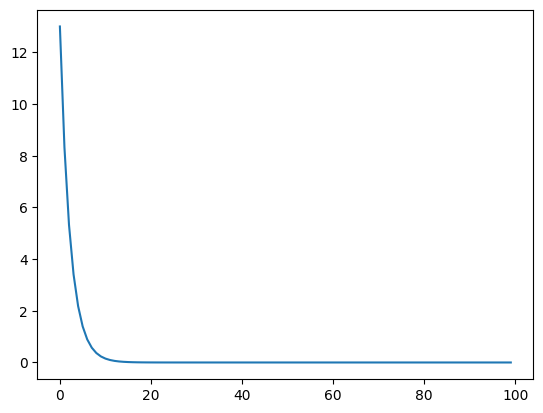

In [14]:
#1001 - tf.keras.optimizers를 이용한 학습 > 함수 최적화
# 교재 69 ~ 70 공부한다 
# loss = x**2 + y ** 2의 최소해를 구하는 문제이다 
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.Variable(2.0)
y = tf.Variable(3.0)

opt = tf.keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.001
##opt = tf.keras.optimizers.Adagrad(0.1) 
##opt = tf.keras.optimizers.Adam(0.1) 
##opt = tf.keras.optimizers.RMSprop(0.1)

loss_list = [ ]
for epoch in range(100):
        with tf.GradientTape() as tape:
                loss = x**2 + y**2               
        loss_list.append(loss.numpy())
        
##        grads = tape.gradient(loss, [x, y])
##        grads_list = [g for g in grads]
##        grads_and_vars = zip(grads_list, [x, y])
        
        dx, dy = tape.gradient(loss, [x, y])
        grads_and_vars = zip([dx, dy], [x, y]) # 순서쌍을 묶는다 
        opt.apply_gradients(grads_and_vars) # 최적화 수행

##        if not epoch%10:
##                print("epoch={}: loss={}".format(epoch, loss.numpy()))
                
print ("x={:.5f}, y={:.5f}, loss={}".format(
        x.numpy(), y.numpy(), loss.numpy()))	
plt.plot(loss_list)
plt.show()




epoch=0: loss=8.320000648498535
epoch=10: loss=0.09592308104038239
epoch=20: loss=0.001105917850509286
epoch=30: loss=1.275036447623279e-05
epoch=40: loss=1.4700168549097725e-07
epoch=50: loss=1.6948142889106066e-09
epoch=60: loss=1.9539881865315856e-11
epoch=70: loss=2.25279511842022e-13
epoch=80: loss=2.5972956661649612e-15
epoch=90: loss=2.9944778589921956e-17
x=0.00000, y=0.00000, loss=5.394372027788135e-19


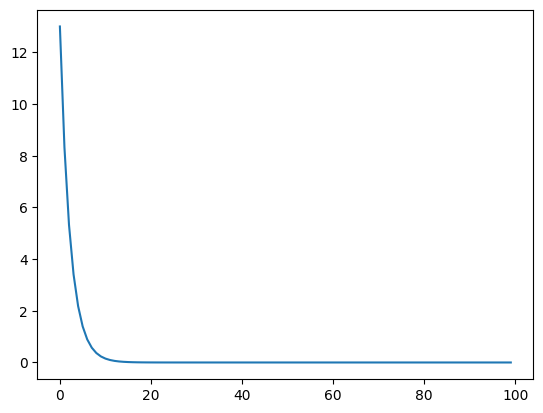

In [15]:
#1002 - 함수 최적화 2
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.Variable(2.0)
y = tf.Variable(3.0)

opt = tf.keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.001
##opt = tf.keras.optimizers.Adagrad(0.1) 
##opt = tf.keras.optimizers.Adam(0.1) 
##opt = tf.keras.optimizers.RMSprop(0.1)

loss_list = [ ]
for epoch in range(100):
        # 람다식은 매개변수 없는 수식
        loss = lambda : x**2+ y**2   # function
        loss_list.append(loss().numpy())
        # 함수 loss에서 변수 리스트 [x,y] 최적화 
        opt.minimize(loss, var_list=[x, y])
	
        if not epoch%10:
                print("epoch={}: loss={}".format(epoch, loss().numpy()))
                
print ("x={:.5f}, y={:.5f}, loss={}".format(
        x.numpy(), y.numpy(), loss().numpy()))

plt.plot(loss_list)
plt.show()


W=[[0.995    ]
 [1.9950006]], b=[2.9950001], loss=0.00043748487951233983


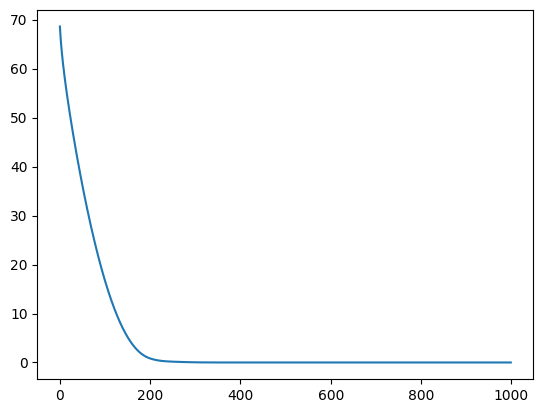

In [16]:
#1003 - 2변수 선형 회귀 : MSE에 의한 경사 하강법
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
    y = tf.matmul(X, W) + b
    return MSE(y, t)
##    return tf.reduce_mean(tf.square(y - t))

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))

#opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adagrad(0.01)
##opt = tf.keras.optimizers.Adam(0.01) 
opt = tf.keras.optimizers.RMSprop(0.01)
     
loss_list = [ ]
for epoch in range(1000):   
    opt.minimize(mse_loss, var_list= [W, b])
    
    loss = mse_loss().numpy()
    loss_list.append(loss)
##    if not epoch % 100:
##            print ("epoch={}: loss={:.5f}".format(epoch, loss))	
                    
print ("W={}, b={}, loss={}".format(
        W.numpy(), b.numpy(), loss))	
plt.plot(loss_list)
plt.show()


In [ ]:
#1004
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
    y = tf.matmul(x_batch, W) + b
    return MSE(y, t_batch)
##    return tf.reduce_mean(tf.square(y - t_batch))

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adagrad(0.01)
##opt = tf.keras.optimizers.Adam(0.01) 
##opt = tf.keras.optimizers.RMSprop(0.01)

train_size = X.shape[0]
batch_size = 4
K = train_size// batch_size

loss_list = [ ]
for epoch in range(1000):
    batch_loss = 0.0
    for  step  in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = X[mask]
        t_batch = t[mask]
        
        opt.minimize(mse_loss, var_list= [W, b])
        loss = mse_loss().numpy()
        batch_loss += loss
        
    batch_loss /= K # average loss
    loss_list.append(batch_loss)
##    if not epoch % 100:
##            print ("epoch={}: batch_loss={:.5f}".format(epoch, batch_loss))	
                    
print ("W={}, b={}, loss={}".format(
        W.numpy(), b.numpy(), batch_loss))	
plt.plot(loss_list)
plt.show()


tf.Tensor(
[ 0.         0.5263158  1.0526316  1.5789474  2.1052632  2.631579
  3.1578948  3.6842108  4.2105265  4.736842   5.263158   5.789474
  6.3157897  6.8421054  7.3684216  7.8947372  8.421053   8.947369
  9.473684  10.       ], shape=(20,), dtype=float32)
tf.Tensor(
[-12.20244     -5.32955     -6.0748167   -7.0224733   -6.1335545
  -4.0675054   -0.35070002   0.6461116    1.515267     2.7694383
   4.537489     5.9383698    8.25066      9.853376    12.470416
  15.901402    17.822475    16.799154    17.781675    20.74665   ], shape=(20,), dtype=float32)
epoch=0: loss=37.226837158203125
epoch=100: loss=12.824580192565918
epoch=200: loss=5.855210304260254
epoch=300: loss=3.433419704437256
epoch=400: loss=2.5918679237365723
epoch=500: loss=2.299438953399658
epoch=600: loss=2.197822093963623
epoch=700: loss=2.162510871887207
epoch=800: loss=2.1502411365509033
epoch=900: loss=2.14597749710083
w=3.1359. b=-10.9725, loss=2.144503593444824


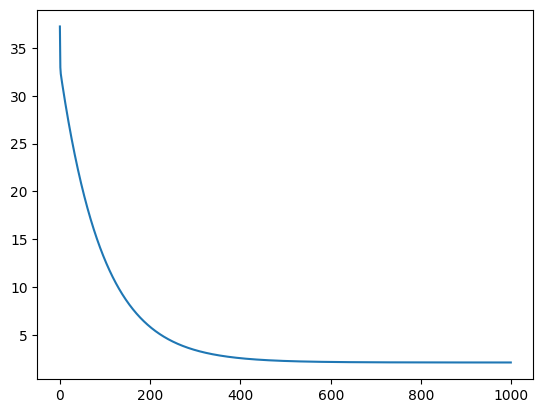

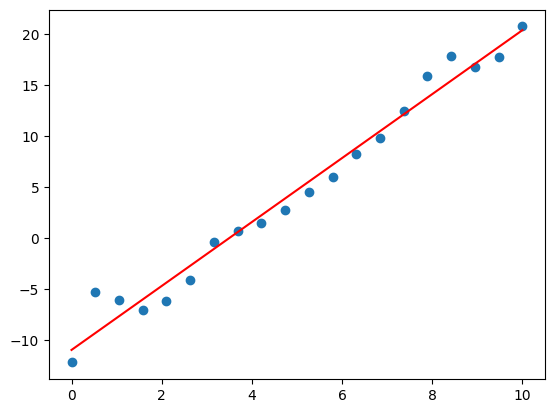

In [2]:
#1101 - 다항식 회귀  n= 1인 다항식: y = wx + b
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = x*w + b # y = 3x - 10
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = tf.linspace(0.0, 10.0, num=train_size) #np.linspace(0.0, 10.0, num=20)
w_true, b_true = 3, -10  # truth, line parameters
t = x*w_true + b_true + tf.random.normal([train_size], mean=0.0, stddev=2.0)
print(x)
print(t)
# train parameters
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_list = [ ]
for epoch in range(EPOCH):   
    opt.minimize(mse_loss, var_list= [w, b]) # 손실함수 mse_loss에서 [w,b]로 최적화한다 
     
    loss = mse_loss().numpy()
    loss_list.append(loss)
    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))

print("w={:>.4f}. b={:>.4f}, loss={}".format(w.numpy(), b.numpy(), loss))

plt.plot(loss_list)
plt.show()

plt.scatter(x, t.numpy())  # train data plot

w_pred, b_pred = w.numpy(), b.numpy() # predicted, line parameters
t_pred= x*w_pred + b_pred 
plt.plot(x, t_pred, 'r-')
plt.show()


epoch=0: loss=544.3562622070312
epoch=100: loss=4.419684410095215
epoch=200: loss=2.8330256938934326
epoch=300: loss=2.6601357460021973
epoch=400: loss=2.5432913303375244
epoch=500: loss=2.446032762527466
epoch=600: loss=2.3645222187042236
epoch=700: loss=2.2961995601654053
epoch=800: loss=2.2389309406280518
epoch=900: loss=2.1909260749816895
a=3.0130. b=2.1439, c=0.8757, loss=2.151054859161377


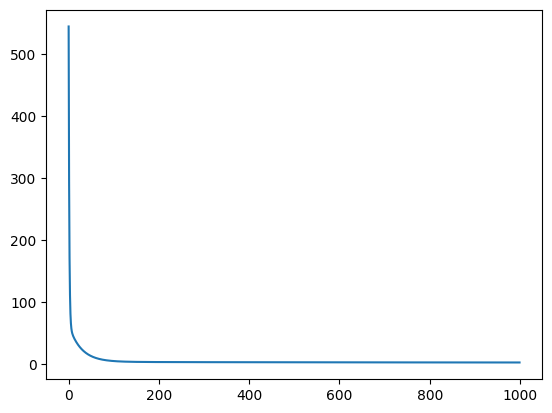

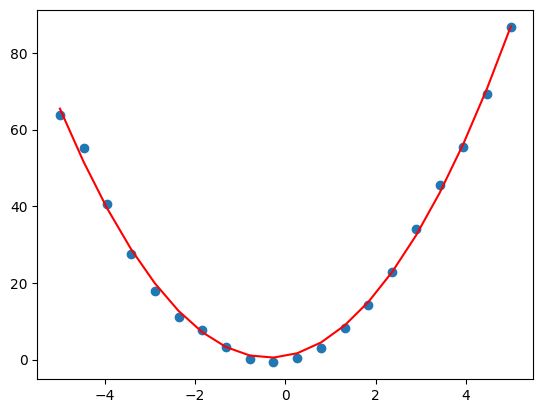

In [3]:
#1102 - n= 2의2차 함수 회귀
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = a*x**2 + b*x+c
##     y = a*tf.pow(x, 2) + b**x + c
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = tf.linspace(-5.0, 5.0, num=train_size)
# 다항식 y = 3x**2 + 2x + 1에 대하여 학습
a_true = tf.Variable(3.0)
b_true = tf.Variable(2.0)
c_true = tf.Variable(1.0)
t = a_true*tf.pow(x, 2) + b_true*x+c_true
t += tf.random.normal([train_size], mean=0.0, stddev = 2) # t 함수에 정규 분포 노이즈를 추가 
#t = tf.add(t, np.random.normal(0, 2.0, train_size))

a = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))
c = tf.Variable(tf.random.normal([]))
                
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

loss_list = [ ]
for epoch in range(EPOCH):   
    opt.minimize(mse_loss, var_list= [a, b, c]) # 최적화  
     
    loss = mse_loss().numpy()
    loss_list.append(loss)

    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))      

print("a={:>.4f}. b={:>.4f}, c={:>.4f}, loss={}".format(
       a.numpy(), b.numpy(), c.numpy(),loss))

plt.plot(loss_list)
plt.show()

plt.scatter(x, t.numpy())

t_pred = a*tf.pow(x, 2) + b*x + c # parabola curve
plt.plot(x, t_pred, 'red')
plt.show()


epoch=0: loss=116886.953125
epoch=100: loss=21675.734375
epoch=200: loss=6637.4345703125
epoch=300: loss=2749.078125
epoch=400: loss=1326.5819091796875
epoch=500: loss=889.1702880859375
epoch=600: loss=774.9905395507812
epoch=700: loss=743.7777709960938
epoch=800: loss=728.99951171875
epoch=900: loss=716.5150146484375
epoch=1000: loss=704.068115234375
epoch=1100: loss=691.460693359375
epoch=1200: loss=678.7669067382812
epoch=1300: loss=666.0794677734375
epoch=1400: loss=653.4857177734375
epoch=1500: loss=641.0645751953125
epoch=1600: loss=628.8849487304688
epoch=1700: loss=617.007080078125
epoch=1800: loss=605.48046875
epoch=1900: loss=594.3460693359375
epoch=2000: loss=583.6339111328125
epoch=2100: loss=573.3636474609375
epoch=2200: loss=563.5482177734375
epoch=2300: loss=554.1882934570312
epoch=2400: loss=545.2794799804688
epoch=2500: loss=536.8076171875
epoch=2600: loss=528.7535400390625
epoch=2700: loss=521.0923461914062
epoch=2800: loss=513.7960205078125
epoch=2900: loss=506.83294

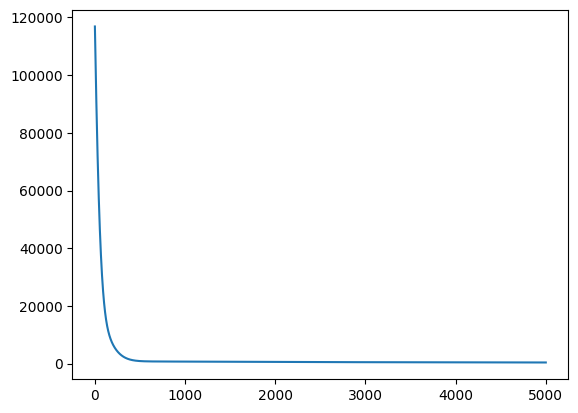

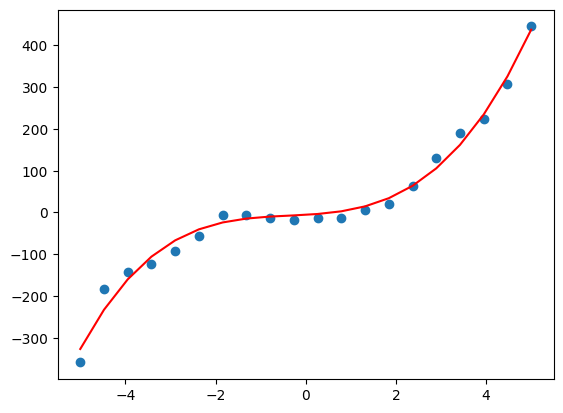

In [4]:
#1103 - n차 다항식 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = tf.zeros_like(x)
     for i in range(W.shape[0]):
          y += W[i]*(x**(i+1)) # y = 3x**3 +2x**2+x+4
     y += b # bias
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 5000
train_size = 20

# create the train data
tf.random.set_seed(1)
x = tf.linspace(-5.0, 5.0, num=train_size)

w_true = tf.Variable([1.0, 2.0, 3.0])
b_true = tf.Variable(4.0)    
t = w_true[2]*x**3 + w_true[1]*x**2 + w_true[0]*x + b_true      
t += tf.random.normal([train_size], mean=0.0, stddev = 30)

# train variables -  훈련 변수 생성
n = 4 # n-th polynomial curve
W = tf.Variable(tf.random.normal([n]))
b = tf.Variable(tf.random.normal([])) 

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

loss_list = [ ]
for epoch in range(EPOCH): 
    opt.minimize(mse_loss, var_list= [W, b])
     
    loss = mse_loss().numpy()
    loss_list.append(loss)

    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))
        
print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(),loss))
plt.plot(loss_list)
plt.show()

plt.scatter(x, t.numpy())

# polynomial curve
t_pred = tf.zeros_like(x)
for i in range(W.shape[0]): # n = W.shape[0] 
     t_pred += W[i]*(x**(i+1))
t_pred += b # bias
     
plt.plot(x, t_pred, 'red')
plt.show()
